# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"  

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | carbonear
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | yeppoon
Processing Record 6 of Set 1 | inirida
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | nagqu
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | yangjiang
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | cadale
Processing Record 21 of Set 1 | tofol
Processing Record 22 of Set 1 | tual
Processing Re

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,11.50,88,92,6.38,RO,1733598634
1,hithadhoo,-0.6000,73.0833,27.79,73,18,5.63,MV,1733598823
2,carbonear,47.7332,-53.2148,1.00,79,100,6.22,CA,1733598824
3,waitangi,-43.9535,-176.5597,14.34,81,92,1.34,NZ,1733598507
4,yeppoon,-23.1333,150.7333,23.20,82,8,1.69,AU,1733598827


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,11.50,88,92,6.38,RO,1733598634
1,hithadhoo,-0.6000,73.0833,27.79,73,18,5.63,MV,1733598823
2,carbonear,47.7332,-53.2148,1.00,79,100,6.22,CA,1733598824
3,waitangi,-43.9535,-176.5597,14.34,81,92,1.34,NZ,1733598507
4,yeppoon,-23.1333,150.7333,23.20,82,8,1.69,AU,1733598827


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

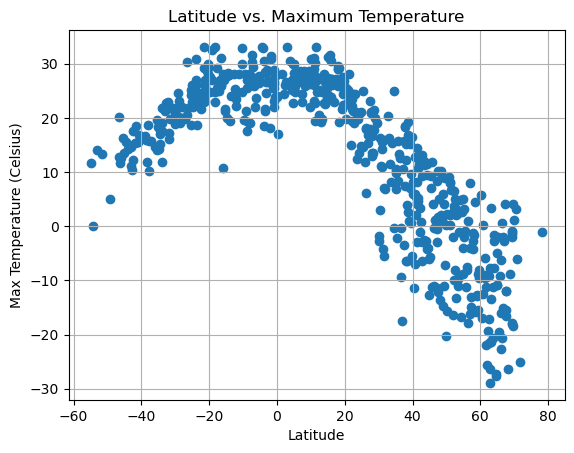

In [48]:
# Build scatter plot for latitude vs. temperature
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(xvalues, yvalues, marker="o")
plt.title("Latitude vs. Maximum Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

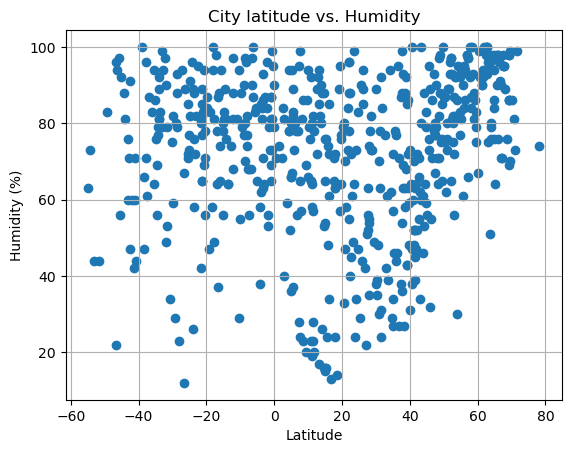

In [50]:
# Build the scatter plots for latitude vs. humidity
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(xvalues, yvalues, marker="o")
plt.title("City latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

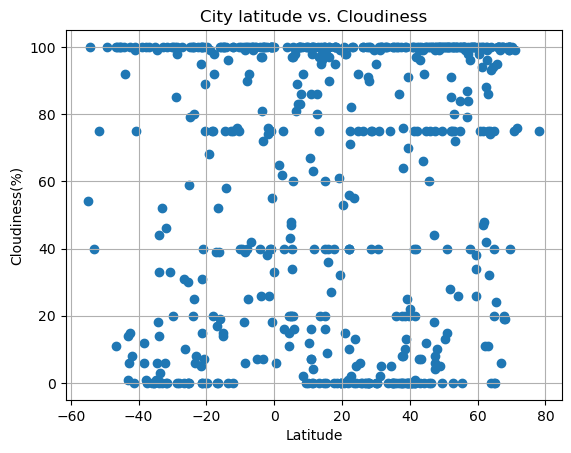

In [52]:
# Build the scatter plots for latitude vs. cloudiness
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(xvalues, yvalues, marker="o")
plt.title("City latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

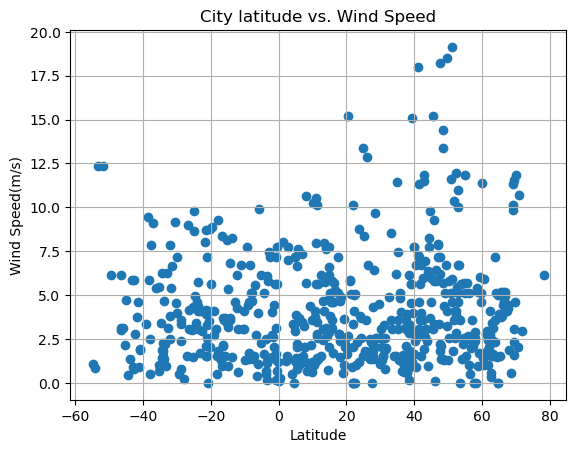

In [121]:
# Build the scatter plots for latitude vs. wind speed
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(xvalues, yvalues, marker="o")
plt.title("City latitude vs. Wind Speed")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [137]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, xlabel, ylabel, title):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate the regression line values
    regress_values = slope * x_values + intercept
    

In [126]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,11.50,88,92,6.38,RO,1733598634
2,carbonear,47.7332,-53.2148,1.00,79,100,6.22,CA,1733598824
5,inirida,3.8653,-67.9239,30.51,59,100,0.50,CO,1733598828
6,olonkinbyen,70.9221,-8.7187,-6.03,73,99,10.69,SJ,1733598646
8,nagqu,31.5000,92.0000,-5.53,24,5,1.86,CN,1733598762


In [128]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hithadhoo,-0.6000,73.0833,27.79,73,18,5.63,MV,1733598823
3,waitangi,-43.9535,-176.5597,14.34,81,92,1.34,NZ,1733598507
4,yeppoon,-23.1333,150.7333,23.20,82,8,1.69,AU,1733598827
7,hermanus,-34.4187,19.2345,17.11,79,1,1.43,ZA,1733598572
10,new norfolk,-42.7826,147.0587,10.40,71,6,5.84,AU,1733598833


###  Temperature vs. Latitude Linear Regression Plot

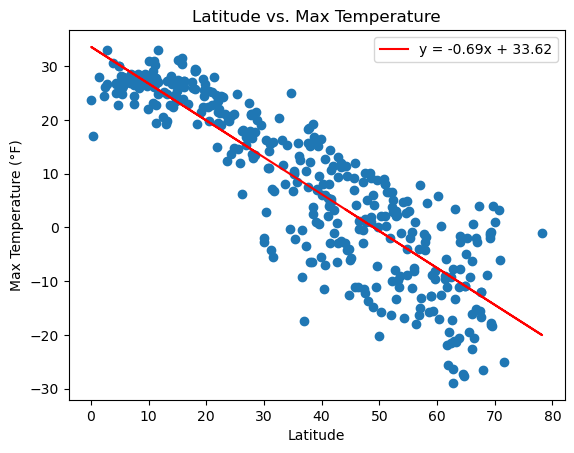

In [149]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Max Temperature')


# Show the legend
plt.legend()

# Display the plot
plt.show()

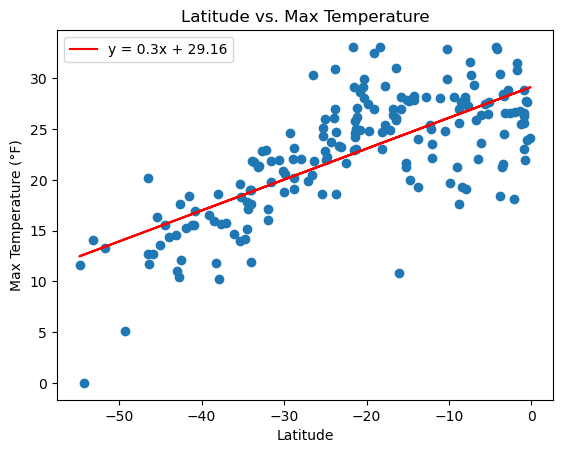

In [151]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Max Temperature')


# Show the legend
plt.legend()

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

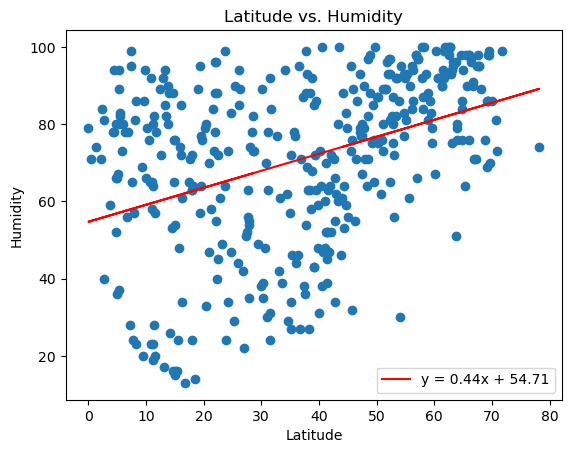

In [159]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')


# Show the legend
plt.legend()

# Display the plot
plt.show()

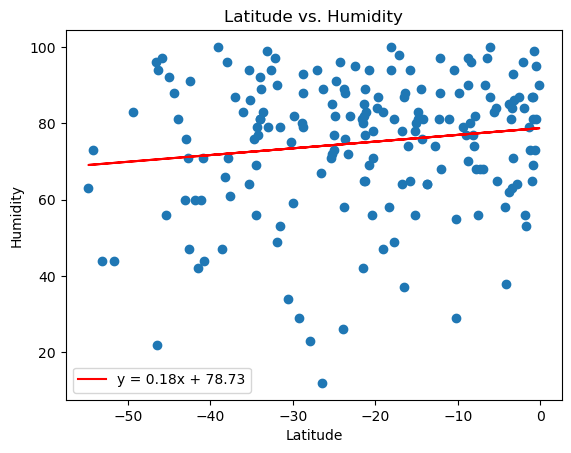

In [161]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')


# Show the legend
plt.legend()

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

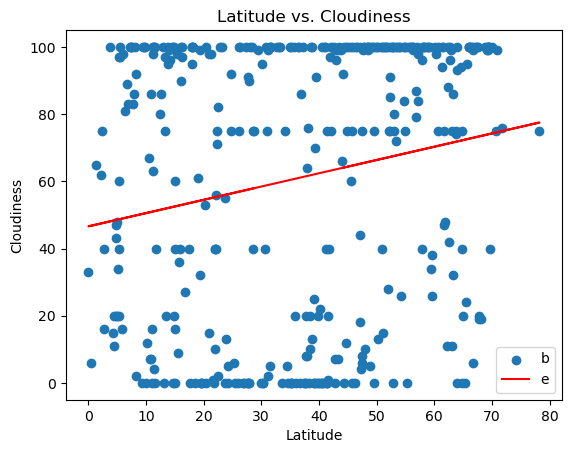

In [165]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')


# Show the legend
plt.legend('best')

# Display the plot
plt.show()

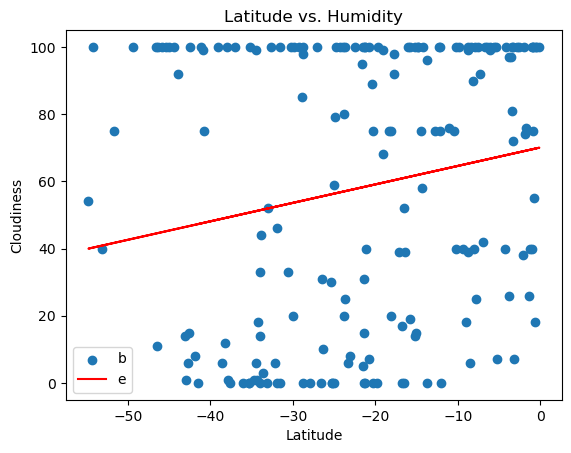

In [169]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Humidity')


# Show the legend
plt.legend('best')

# Display the plot
plt.show()

**Discussion about the linear relationship:** The analysis of Linear Regression plots indicates that both cloudiness and humidity increases with latitude in both hemispheres, with the strength of these relationships measured by statistic proportion of the variance for a dependent variable (R^2). The higher the R^2 the strongest linear relationship it is, aiding in understanding the variation of cloudiness and humidity with latitude across different regions.

### Wind Speed vs. Latitude Linear Regression Plot

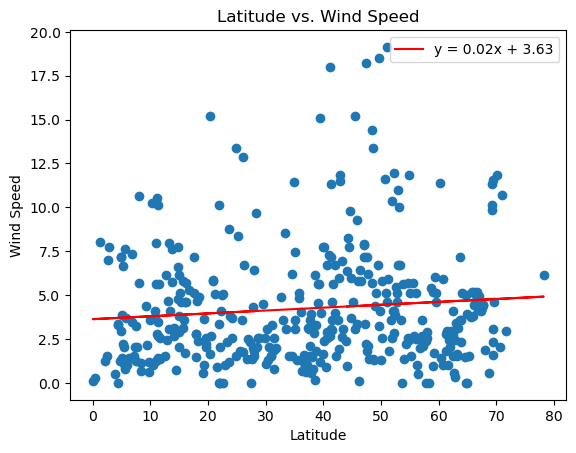

In [177]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')


# Show the legend
plt.legend()

# Display the plot
plt.show()

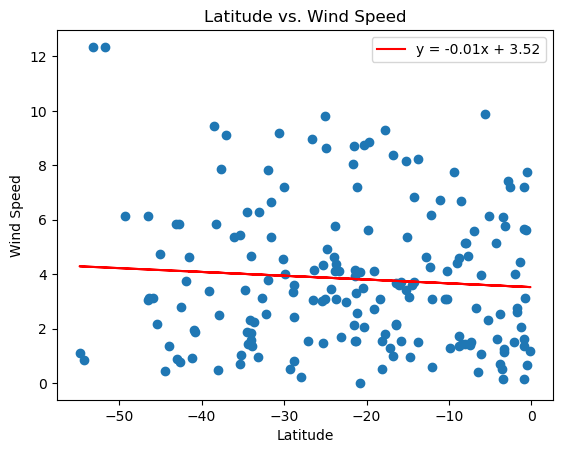

In [175]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o")
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x_values, regress_values, 'r-', label=line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')


# Show the legend
plt.legend()

# Display the plot
plt.show()

**Discussion about the linear relationship:** The analysis of the linear relationship between wind speed and latitude provides important insights into atmospheric dynamics and climatic variations. By interpreting regression results, including slopes and R² values, we can better understand the influence of latitude on wind patterns and identify other factors that may affect these relationships, guiding future research in this area.